In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [99]:
data = pd.read_csv(r"E:\Machine Learning\Linear Regression\Algerian_forest_fires_dataset_UPDATE.csv",header=1)

In [100]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


### Cleaning the dataset

In [102]:
data[data.isna().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


##### The dataset is converted into two sets based on Region from 122th index, we can make a new column based on the Region  

In [103]:
data.loc[:122,"Region"]=0
data.loc[122:,"Region"]=1

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [105]:
data[["Region"]]=data[["Region"]].astype('int')

In [106]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [107]:
data.isna().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [108]:
data = data.dropna().reset_index(drop=True)

In [109]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [110]:
data.isna().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [111]:
data=data.drop(122).reset_index(drop=True)

In [112]:
data.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [113]:
#Fixing the names of the columns
data.columns = data.columns.str.strip()

In [114]:
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [115]:
data[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']]=data[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   Temperature  243 non-null    int64 
 4   RH           243 non-null    int64 
 5   Ws           243 non-null    int64 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.6+ KB


In [117]:
objects = [features for features in data.columns if data[features].dtypes=='O']

In [118]:
for i in objects:
    if i !='Classes':
        data[i]=data[i].astype(float)

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [120]:
data.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


#### EDA

In [121]:
df = data.drop(['day','month','year'],axis=1)

In [122]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [123]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

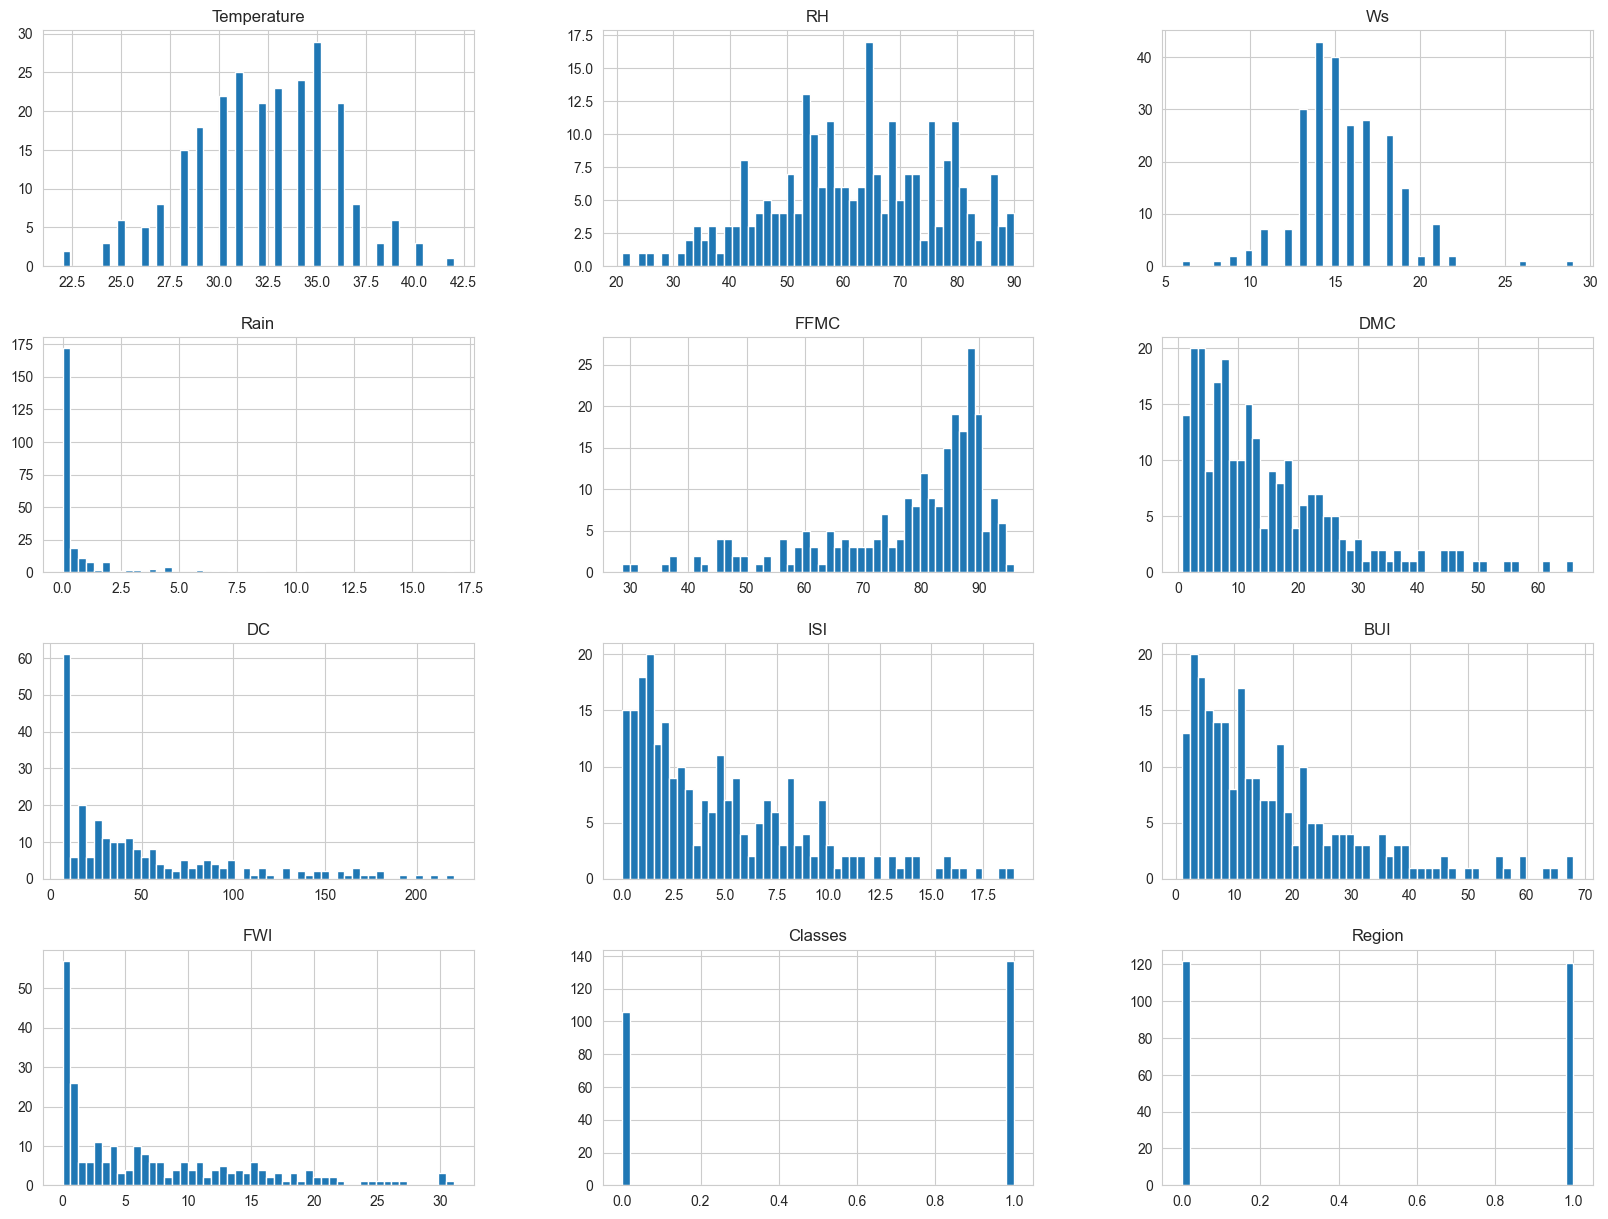

In [124]:
#Plotting density plot for all features
#plt.style.use('seaborn')
df.hist(bins=50, figsize=(20,15))
plt.show()

In [125]:
percentage = df['Classes'].value_counts(normalize=True)*100

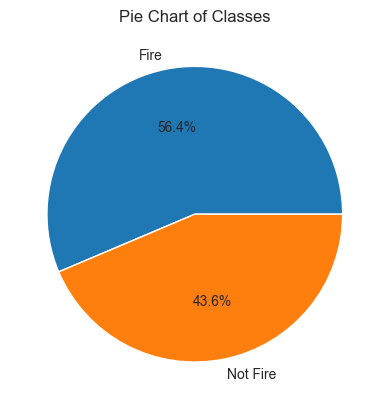

In [126]:
classlabels = ["Fire","Not Fire"]
plt.pie(percentage,labels=classlabels,autopct='%1.1f%%')
plt.title("Pie Chart of Classes")
plt.show()

In [127]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

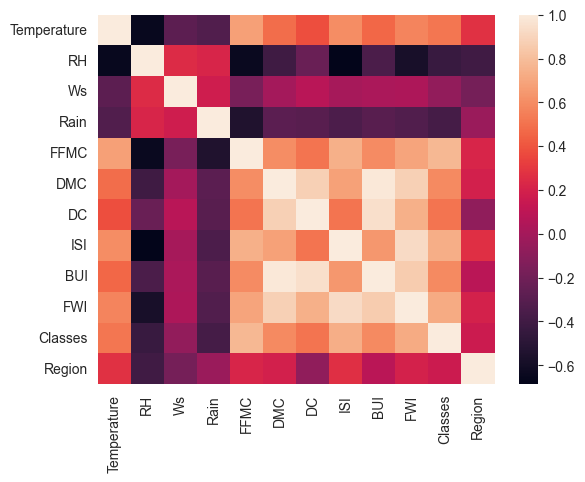

In [128]:
sns.heatmap(df.corr())

<Axes: ylabel='FWI'>

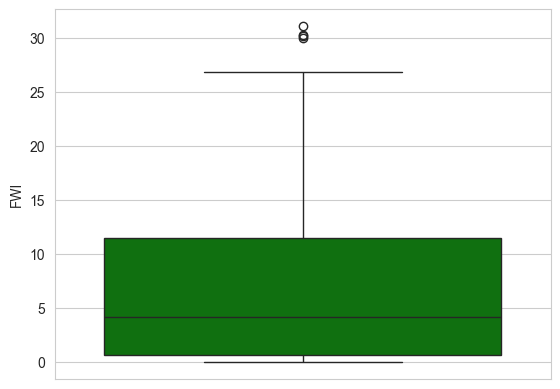

In [129]:
sns.boxplot(df["FWI"],color='green')

In [130]:
data['Classes']=np.where(data['Classes'].str.contains('not fire'),'not fire','fire')

Text(0.5, 1.0, 'Fire Analysis of Sidi-Bel Region')

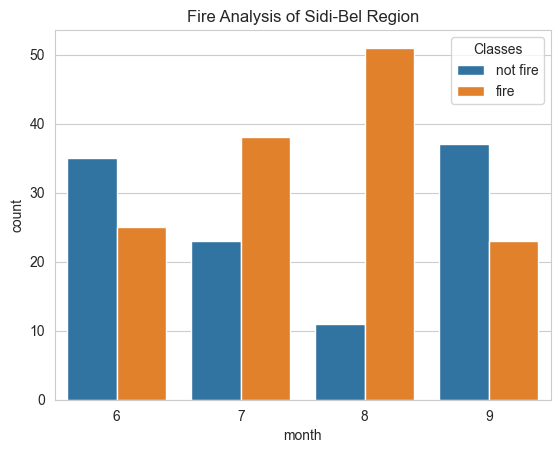

In [131]:
# Monthly Fire Analysis
dftemp = df.loc[df['Region']==1]
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=data)
plt.title('Fire Analysis of Sidi-Bel Region')

Text(0.5, 1.0, 'Fire Analysis of Bejaia Region')

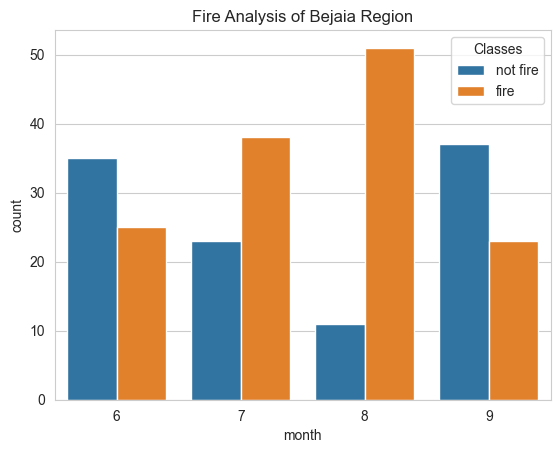

In [132]:
# Monthly Fire Analysis
dftemp = df.loc[df['Region']==1]
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=data)
plt.title('Fire Analysis of Bejaia Region')

Text(0.5, 1.0, 'Fire Analysis of Bejaia Region')

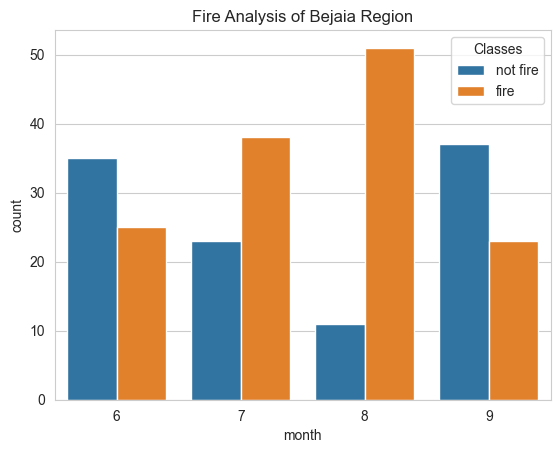

In [133]:
# Monthly Fire Analysis
dftemp = df.loc[df['Region']==0]
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=data)
plt.title('Fire Analysis of Bejaia Region')

It's observed that Aug and Sep had the most number of fires for both regions. And from above plots, we can understand fw things.
Most of the fire happens in August.

### Model Training

In [134]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

In [135]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [136]:
#Independent and Dependent Features
X = df.drop('FWI',axis=1)
Y = df['FWI']

In [138]:
from sklearn.model_selection import train_test_split

In [139]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

In [141]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

In [142]:
#Feature Selection based on Correlation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

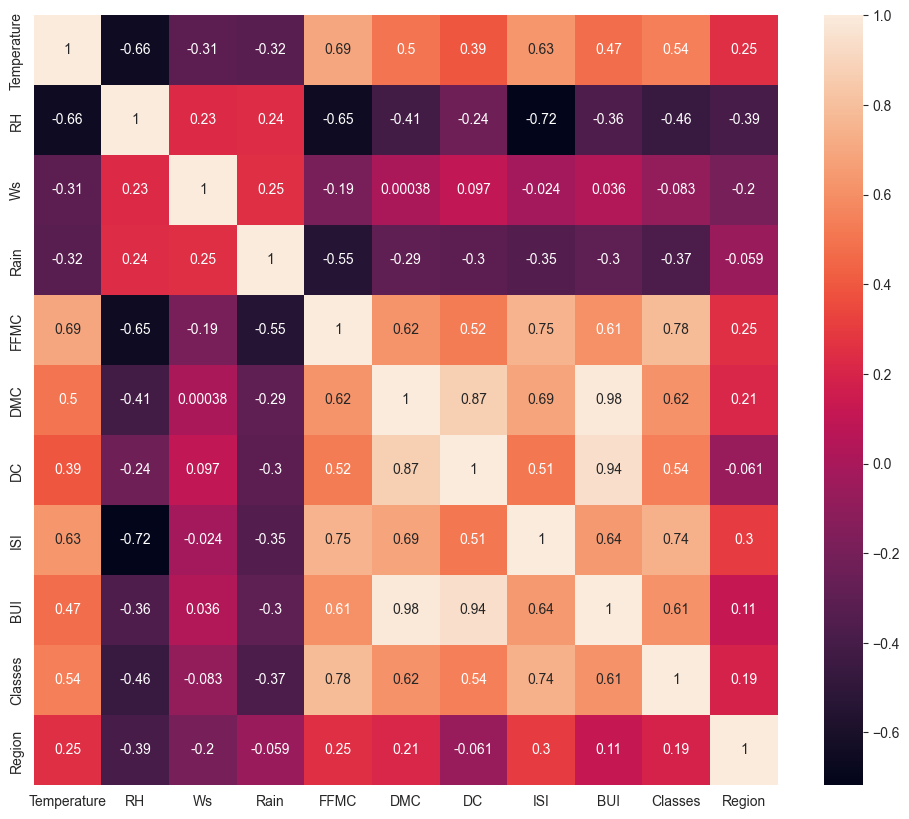

In [145]:
plt.figure(figsize=(12,10))
sns.heatmap(X_train.corr(),annot=True)

In [148]:
def correlation(data, threshold):
    col_corr = set()
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                col_name = corr_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr
                   

In [153]:
corr_features = correlation(X_train,0.85)

In [154]:
# Dropping features where correlation is more than 0.85
X_train.drop(corr_features,axis=1, inplace = True)
X_test.drop(corr_features,axis=1, inplace = True)
X_train.shape,X_test.shape

((182, 9), (61, 9))

In [155]:
# Feature Scaling - Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [156]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

Text(0.5, 1.0, 'Training Data')

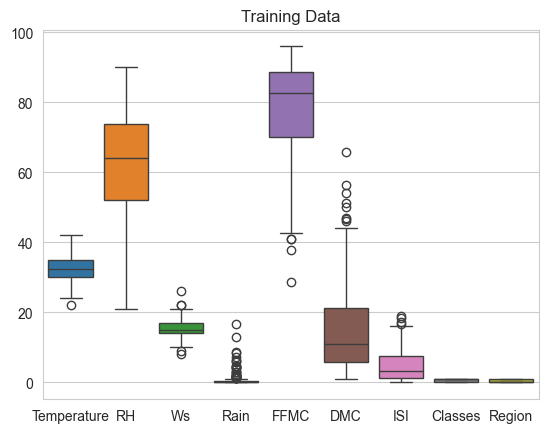

In [164]:
sns.boxplot(data=X_train)
plt.title('Training Data')


Text(0.5, 1.0, 'Scaled Training Data')

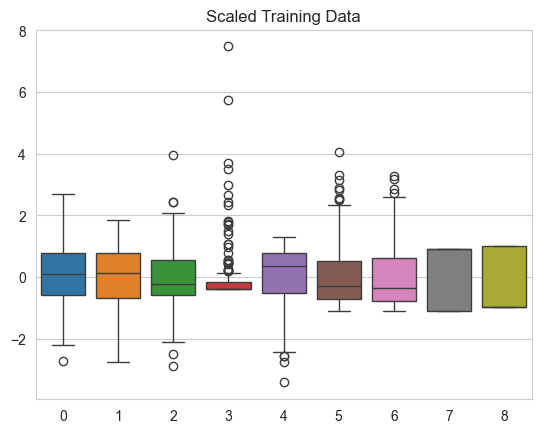

In [165]:
sns.boxplot(data=X_train_scaled)
plt.title('Scaled Training Data')

### Linear Regression

In [168]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaled,Y_train)
Y_pred = linreg.predict(X_test_scaled)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print("MAE",mae)
print("R2 Score",r2)

MAE 0.9939450225331379
R2 Score 0.9607056657860652


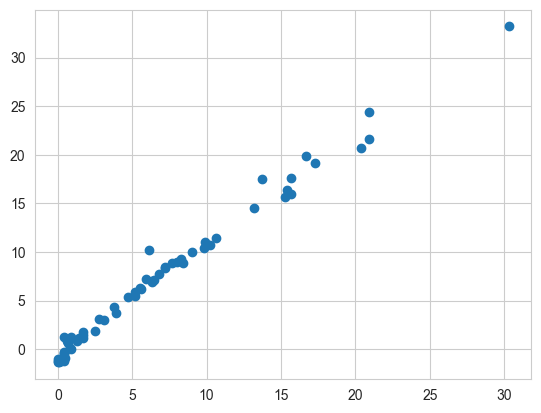

In [169]:
plt.scatter(Y_test,Y_pred)

### Lasso Regression

In [170]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score
Lasso=Lasso()
Lasso.fit(X_train_scaled,Y_train)
Y_pred = Lasso.predict(X_test_scaled)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print("MAE",mae)
print("R2 Score",r2)

MAE 0.9605020166901078
R2 Score 0.9692970913627958


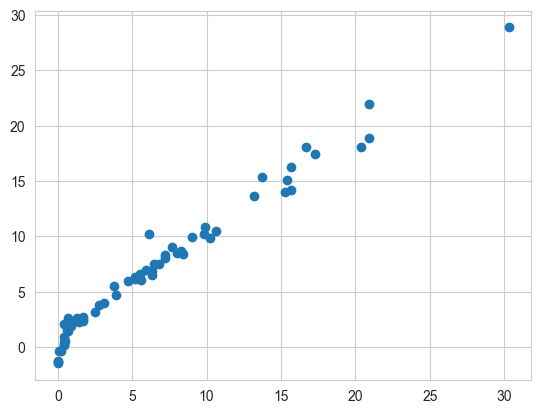

In [171]:
plt.scatter(Y_test,Y_pred)

MAE 0.9630024676566873
R2 Score 0.9611112947220234


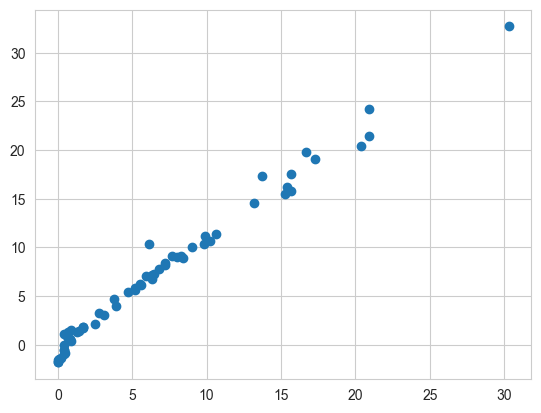

In [176]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error, r2_score
Lasso=LassoCV(cv=5)
Lasso.fit(X_train_scaled,Y_train)
Y_pred = Lasso.predict(X_test_scaled)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print("MAE",mae)
print("R2 Score",r2)
plt.scatter(Y_test,Y_pred)

### Ridge Regression

MAE 0.9862070802884395
R2 Score 0.9616458508455313


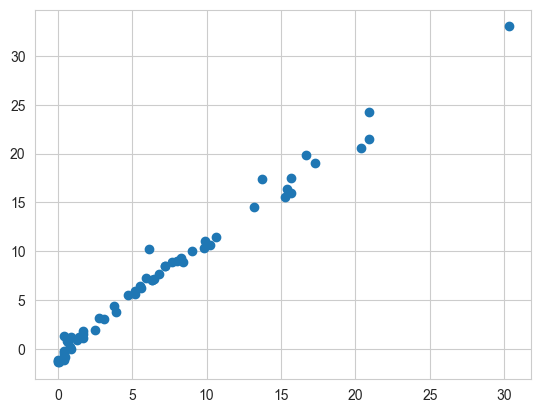

In [173]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,Y_train)
Y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print("MAE",mae)
print("R2 Score",r2)
plt.scatter(Y_test,Y_pred)

### Elasticnet

MAE 1.6511868133560943
R2 Score 0.9081701979826985


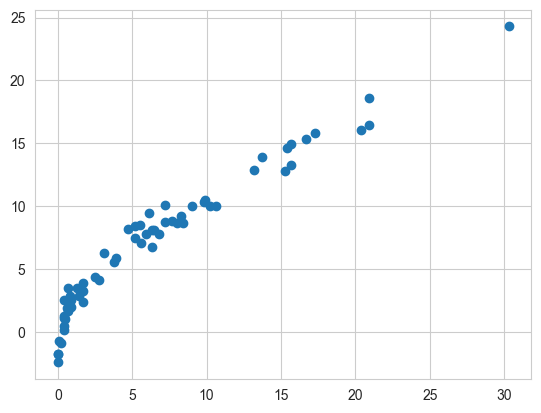

In [174]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, r2_score
elasticnet=ElasticNet()
elasticnet.fit(X_train_scaled,Y_train)
Y_pred = elasticnet.predict(X_test_scaled)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print("MAE",mae)
print("R2 Score",r2)
plt.scatter(Y_test,Y_pred)